In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
import numpy as np

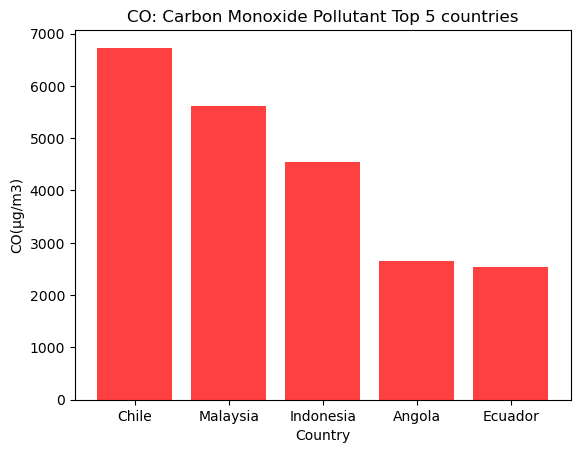

In [21]:
#Display top 5 polluted countries by CO - create subset, order, print graph and details, save png 
pollutants_vs_deaths1 = "Rhiannyn_Resources/final_merged_world_data.csv"

pollutants_1_df = pd.read_csv(pollutants_vs_deaths1)

Country = pollutants_1_df["Country"]
pollutants_1_df.sort_values("CO",ascending = False, inplace = True)
OutlierData1 = pollutants_1_df[:5]

OLCO_Emissions = OutlierData1["CO"]
OLCONames = OutlierData1["Country"]

plt.title("CO: Carbon Monoxide Pollutant Top 5 countries")
plt.xlabel("Country")
plt.ylabel("CO(μg/m3)")

plt.bar(OLCONames, OLCO_Emissions, facecolor="red", alpha=0.75, align="center")
plt.savefig("Rhiannyn_Output/C0bycountry.png")
plt.show()

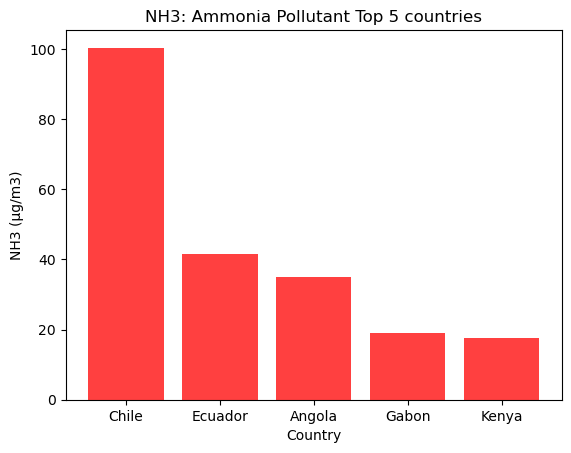

In [22]:
pollutants_vs_deaths2 = "Rhiannyn_Resources/final_merged_world_data.csv"
pollutants_2_df = pd.read_csv(pollutants_vs_deaths2)

#Display top 5 polluted countries by NH3
Country = pollutants_2_df["Country"]
pollutants_2_df.sort_values("NH3",ascending = False, inplace = True)
OutlierData2 = pollutants_2_df[:5]

OLNH3_Emissions = OutlierData2["NH3"]
OLCNames2 = OutlierData2["Country"]

plt.title("NH3: Ammonia Pollutant Top 5 countries")
plt.xlabel("Country")
plt.ylabel("NH3 (μg/m3)")

plt.bar(OLCNames2, OLNH3_Emissions, facecolor="red", alpha=0.75, align="center")
plt.savefig("Rhiannyn_Output/NH3bycountry.png")
plt.show()


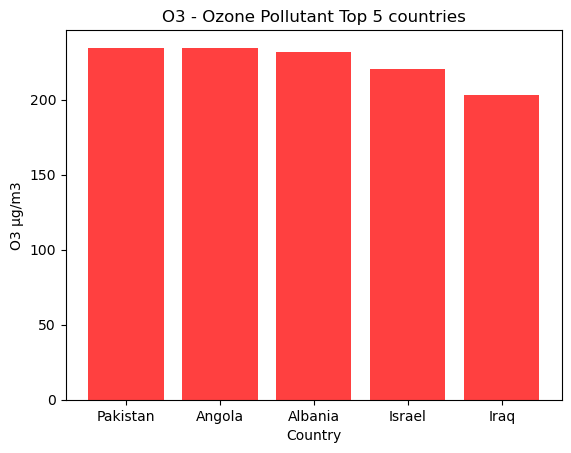

In [23]:
pollutants_vs_deaths3 = "Rhiannyn_Resources/final_merged_world_data.csv"
pollutants_3_df = pd.read_csv(pollutants_vs_deaths3)

Country = pollutants_3_df["Country"]
pollutants_3_df.sort_values("O3",ascending = False, inplace = True)
OutlierData3 = pollutants_3_df[:5]

OLo3_Emissions = OutlierData3["O3"]
OL03Names = OutlierData3["Country"]

plt.title("O3 - Ozone Pollutant Top 5 countries")
plt.xlabel("Country")
plt.ylabel("O3 μg/m3")

plt.bar(OL03Names, OLo3_Emissions, facecolor="red", alpha=0.75, align="center")
plt.savefig("Rhiannyn_Output/O3bycountry.png")
plt.show()



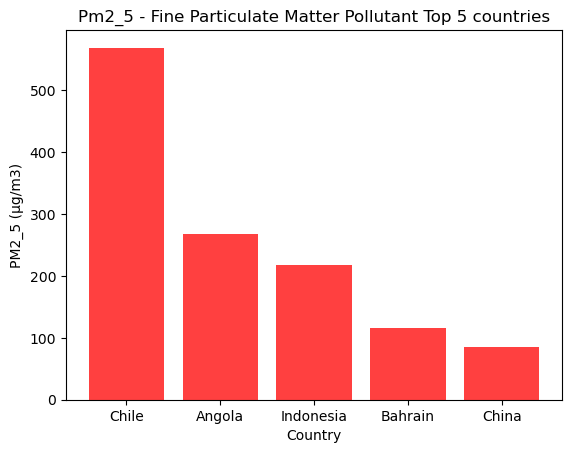

 Fine particulate matter is defined as particles that are 2.5 microns or less in diameter (PM2.5). Therefore, PM2.5 comprises a portion of PM10.


In [24]:
pollutants_vs_deaths4 = "Rhiannyn_Resources/final_merged_world_data.csv"
pollutants_4_df = pd.read_csv(pollutants_vs_deaths4)

Country = pollutants_4_df["Country"]
pollutants_4_df.sort_values("PM2_5",ascending = False, inplace = True)
OutlierData4 = pollutants_4_df[:5]

OLNH3_Emissions = OutlierData4["PM2_5"]
OLCNames = OutlierData4["Country"]

plt.title("Pm2_5 - Fine Particulate Matter Pollutant Top 5 countries")
plt.xlabel("Country")
plt.ylabel("PM2_5 (μg/m3)")

plt.bar(OLCNames, OLNH3_Emissions, facecolor="red", alpha=0.75, align="center")
plt.savefig("Rhiannyn_Output/PM25bycountry.png")
plt.show()
print(f" Fine particulate matter is defined as particles that are 2.5 microns or less in diameter (PM2.5). Therefore, PM2.5 comprises a portion of PM10.")

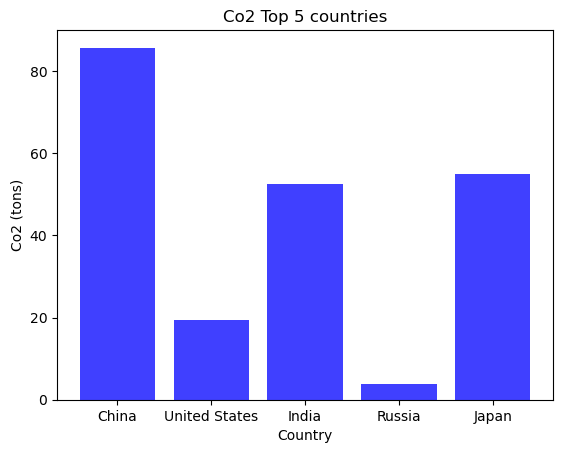

In [25]:
pollutants_vs_deaths5 = "Rhiannyn_Resources/final_merged_world_data.csv"
pollutants_5_df = pd.read_csv(pollutants_vs_deaths5)

Country = pollutants_5_df["Country"]
pollutants_5_df.sort_values("Co2-Emissions",ascending = False, inplace = True)
OutlierData5 = pollutants_5_df[:5]

Co2_Emissions = OutlierData5["PM2_5"]
OLC5Names = OutlierData5["Country"]

plt.title("Co2 Top 5 countries")
plt.xlabel("Country")
plt.ylabel("Co2 (tons)")

plt.bar(OLC5Names, Co2_Emissions, facecolor="blue", alpha=0.75, align="center")
plt.savefig("Rhiannyn_Output/Co2bycountry.png")
plt.show()

In [15]:
# Conduct the one-way ANOVA on 1-5 AQUI by deaths, check for statistical significance:

pollutants_vs_deaths = "Rhiannyn_Resources/final_merged_world_data.csv"
pollutants_vs_deaths_df = pd.read_csv(pollutants_vs_deaths)

f_oneway(pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==1]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==2]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==3]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==4]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==5]["Air pollution(deaths per 100,000)"])




F_onewayResult(statistic=4.051439039143257, pvalue=0.003709546599922584)

In [16]:
# conduct ANOVA on 2-5 AQI, since group 1 seems to be a class unto its own:

f_oneway(pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==2]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==3]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==4]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==5]["Air pollution(deaths per 100,000)"])

F_onewayResult(statistic=1.796977922384155, pvalue=0.1528466981388688)

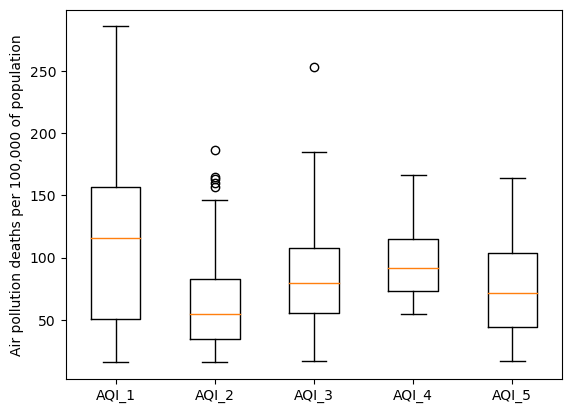

In [18]:
#plot the air quality index groups against air pollution deaths per 100000 of population
my_dict = {'AQI_1': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==1]["Air pollution(deaths per 100,000)"],\
           'AQI_2': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==2]["Air pollution(deaths per 100,000)"],\
           'AQI_3': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==3]["Air pollution(deaths per 100,000)"],\
           'AQI_4': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==4]["Air pollution(deaths per 100,000)"],\
           'AQI_5': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==5]["Air pollution(deaths per 100,000)"]}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.ylabel("Air pollution deaths per 100,000 of population")
plt.savefig("Rhiannyn_Output/API_Deaths_Box.png")